Data Preprocessing and other operations

In [60]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
#reading the csv file into a pandas dataframe
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [62]:
#showing the top 5 movies in the dataset
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [63]:
#information about the dataset and its attibutes. we can see date is a string type we need to change it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [64]:
#we can also see that for multiple genres we have ', ' after each one so we need to remove those also
df['Genre']

0       Action, Adventure, Science Fiction
1                 Crime, Mystery, Thriller
2                                 Thriller
3       Animation, Comedy, Family, Fantasy
4         Action, Adventure, Thriller, War
                       ...                
9822                          Drama, Crime
9823                                Horror
9824             Mystery, Thriller, Horror
9825                 Music, Drama, History
9826           War, Drama, Science Fiction
Name: Genre, Length: 9827, dtype: object

In [65]:
#checking to see if there are any duplicates in our dataset. it is zero
df.duplicated().sum()

np.int64(0)

In [66]:
#this function helps describe the dataset in terms of statistics like mean, median, mode, standard deviation etc
#it only does so for numeric values
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


data preprocessing 
1. removing useless columns like overview, original language and poster url
2. removing ', ' from genres
3. changing release date to date time format and extracting only the year from it

In [67]:
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [68]:
#changing release date to date time format
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes) #checking data type
df['Release_Date'] = df['Release_Date'].dt.year #changing to year only
df['Release_Date'].dtypes #checking data type again

datetime64[ns]


dtype('int32')

In [69]:
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [70]:
#removing unused columns like overview, original language and poster url
cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis = 1, inplace = True)

In [71]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [72]:
df.head(5)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [73]:
#categorizing movies as blockbuster, average, below_avg, anf flop

def categories(df, col, labels):
    brackets = [df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]

    df[col] = pd.cut(df[col], brackets, labels = labels, duplicates = 'drop')
    return df

In [74]:
labels = ['flop', 'below_avg', 'average', 'blockbuster']

In [75]:
categories(df, 'Vote_Average', labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,blockbuster,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,blockbuster,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,blockbuster,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,blockbuster,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,flop,Horror
9824,2016,The Offering,13.355,94,flop,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"


In [76]:
df['Vote_Average'].unique()

['blockbuster', 'below_avg', 'average', 'flop', NaN]
Categories (4, object): ['flop' < 'below_avg' < 'average' < 'blockbuster']

In [77]:
df.head(5)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,blockbuster,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,blockbuster,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,blockbuster,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [78]:
df['Vote_Average'].value_counts()

Vote_Average
flop           2467
blockbuster    2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [79]:
df.dropna(inplace= True)

In [80]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [81]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,blockbuster,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,blockbuster,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,blockbuster,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [82]:
#separating multiple genres into multiple lines
df['Genre'] = df['Genre'].str.split(', ')

In [83]:
df = df.explode('Genre').reset_index(drop=True)

In [84]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,blockbuster,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,blockbuster,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,blockbuster,Science Fiction
3,2022,The Batman,3827.658,1151,blockbuster,Crime
4,2022,The Batman,3827.658,1151,blockbuster,Mystery


In [85]:
#casting column into category
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [88]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

Exploratory Data Analysis
1. What is the most frequent genre of movies released on Netflix?
2. What genres have the highest votes in vote_avg column?
3. Which movie has the highest popularity? What is its genres?
4. Which movie has the lowest popularity? What is its genres?
5. Which year has the most filmed movies?

In [89]:
sns.set_style('whitegrid')

In [96]:
#1. What is the most frequent genre of movies released on Netflix?
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

Text(0.5, 1.0, 'Total number of movies in different genres')

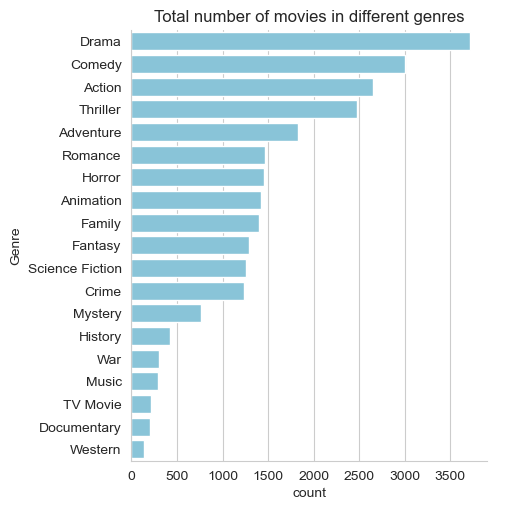

In [98]:
sns.catplot(y = 'Genre', data = df, kind  ='count',
            order = df['Genre'].value_counts().index,
           color = '#7ccbe5')

plt.title('Total number of movies in different genres')

In [99]:
df.head(5)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,blockbuster,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,blockbuster,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,blockbuster,Science Fiction
3,2022,The Batman,3827.658,1151,blockbuster,Crime
4,2022,The Batman,3827.658,1151,blockbuster,Mystery


Text(0.5, 1.0, 'Vote Distribution')

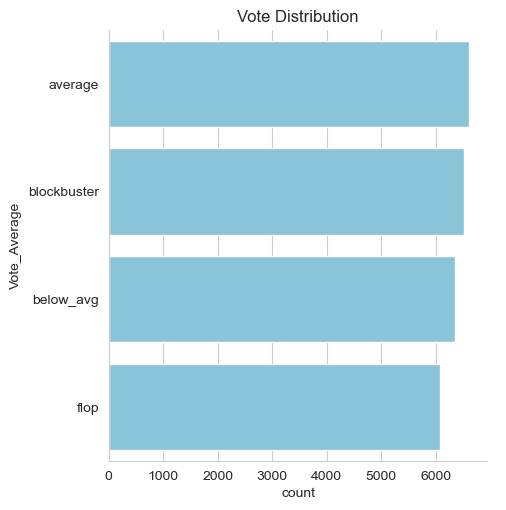

In [108]:
#2. What genres have the highest votes in vote_avg column?
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
           order = df['Vote_Average'].value_counts().index,
           color = '#7ccbe5')
plt.title('Vote Distribution')

In [110]:
#3. Which movie has the highest popularity? What is its genres?
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,blockbuster,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,blockbuster,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,blockbuster,Science Fiction


In [111]:
#4. Which movie has the lowest popularity? What is its genres?
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,blockbuster,War
25550,1984,Threads,13.354,186,blockbuster,Drama
25551,1984,Threads,13.354,186,blockbuster,Science Fiction


Text(0.5, 1.0, 'Release Date distribution')

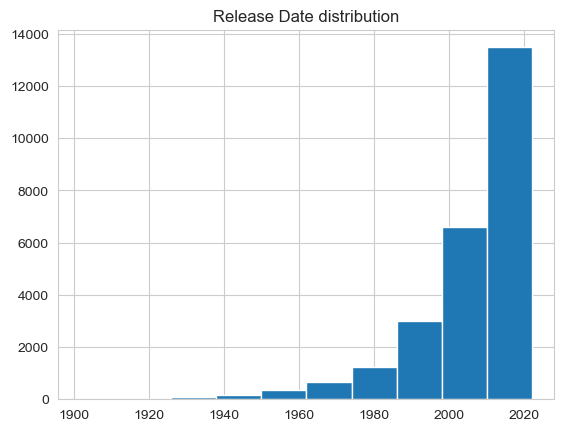

In [112]:
#5. Which year has the most filmed movies?
df['Release_Date'].hist()
plt.title('Release Date distribution')

### Summary

Exploratory Data Analysis
1. What is the most frequent genre of movies released on Netflix?
Ans. Drama

2. What genres have the highest votes in vote_avg column?
Ans. Average

3. Which movie has the highest popularity? What is its genres?
Ans. Spider Man: No Way Home - Action, Adventure, Science Fiction

4. Which movie has the lowest popularity? What is its genres?
Ans. The United States vs. Billie Holiday - Music, Drama, History
Threads - War, Drama, Science Fiction

5. Which year has the most filmed movies?
Ans. 2020